# Analyzing Real vs. Fake News Article Headlines 📰

Author:<br>[Navraj Narula](http://navierula.github.io)<br><br>
Data Source: <br>[Randomly-Collected Fake News Dataset](https://github.com/BenjaminDHorne/fakenewsdata1)<br><br>
Resources Consulted: <br>[Text Mining with R](http://tidytextmining.com)<br>[R: Text Classification using a K Nearest Neighbour Model](http://garonfolo.dk/herbert/2015/05/r-text-classification-using-a-k-nearest-neighbour-model/)

In [27]:
# turn off warnings
options(warn=-1)

In [28]:
# import libraries
library(dplyr)
library(ggplot2)
library(tidytext)
library(stringr)
library(RColorBrewer)
library(tm) 
library(class) 
library(SnowballC)

In [29]:
# load in dataset
mydata = read.csv("cleaned_data/headlines.txt",sep="\t",stringsAsFactors = FALSE,col.names=c("text", "status"),fill=TRUE)

In [30]:
# remove rows with empty values
mydata = mydata[!apply(mydata, 1, function(x) any(x=="")),] 

In [31]:
# preview the first five rows
# (mostly fake articles at the top)
head(mydata)

text,status
"BREAKING News Trump DEFIES Obama, Tells Americans What Obama is Doing Behind the Scenes",fake
Turkeys Erdogan Says U.S. Supports ISIL: We Have Evidence With Pictures & Videos,fake
Egyptian paper: Transcript proves Kerry plotted UN resolution against Israel with Palestinians and Report,fake
Obamas Racist Attacks Against White Working Class Caused Historic Democrat Party Collapse,fake
Turkey President Claims Has Video Evidence Obama Is Supporting ISIS,fake
"WHOA Liberals Attacked Trump Inauguration Singer, But They Got KNOCKED OUT by America!",fake


In [32]:
# preview the last five rows
# (mostly real articles at the bottom)
tail(mydata)

,text,status
132,"Feds: Pension Exec Moved $2B for Coke, Hookers, Other Bribes",real
133,"Before Trump's Presidency, US Privacy Board in Disarray",real
134,Inside the Clinton Email Search Warrant,real
135,"Clinton FBI Director Backs Trump's Attorney General Pick Jeff Sessions, Defends His Records on Civil Rights",real
136,Trump sons distance themselves from fundraiser,real
137,Walmart pulls 'Black Lives Matter' shirts from website after cop complaints,real


In [33]:
# calculate term/word frequency for words present in articles
news_words <- mydata %>%
  unnest_tokens(word, text) %>%
  count(status, word, sort = TRUE) %>%
  ungroup()

total_words <- news_words %>% 
  group_by(status) %>% 
  summarize(total = sum(n))

news_words <- left_join(news_words, total_words)

news_words

Joining, by = "status"


status,word,n,total
real,trump,28,633
fake,obama,20,842
fake,trump,19,842
fake,in,17,842
real,to,17,633
fake,the,16,842
fake,to,13,842
fake,breaking,12,842
fake,of,11,842
fake,and,9,842


From the table above, we can see that the word "trump" is not only the most commonly used word in real news article headlines, but also the most commonly used world overall. This makes sense given the past election cycle. Out of 633 total words that appeared in real news article headlines, the word "trump" appeared 28 times, or rather 4.4% overall.<br><br>
In fake news article headlines, the most commonly used word was "obama," and following that, "trump" once again. These words appeared 20 out of 842 times and 19 out of 842 times. Respectively, 2.3% and 2.2%.

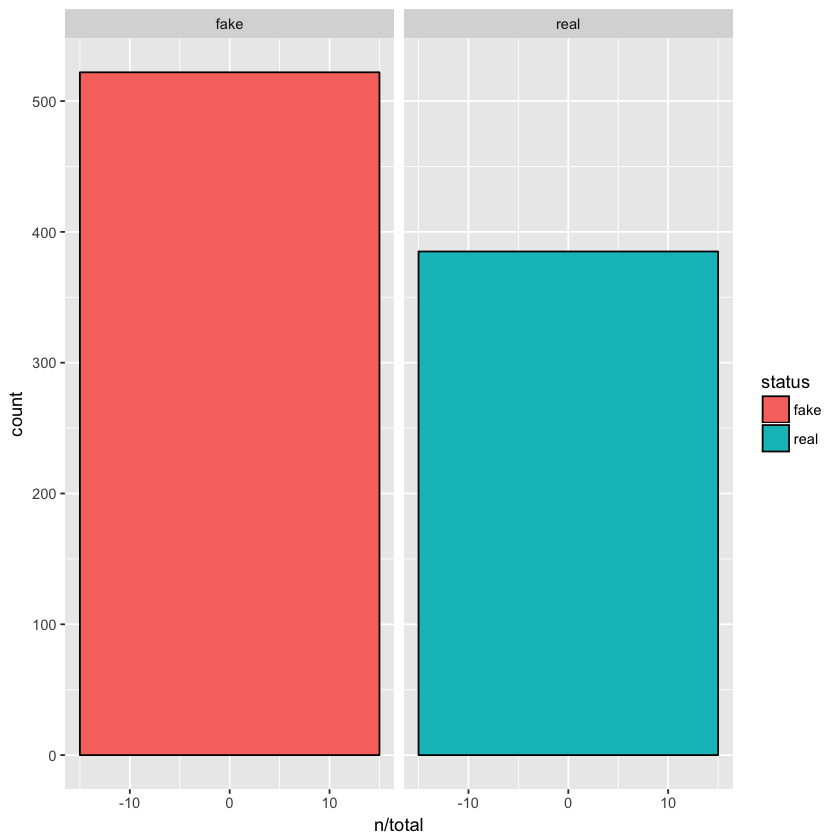

In [34]:
# visualize word counts in buckets
ggplot(news_words, aes(n/total, fill = status)) +
  geom_histogram(show.legend = TRUE,binwidth = 30,color="black") +
  facet_wrap(~status, ncol = 4) 

The visualization above simply counts the number of words present in each type of headline. For fake news headlines, the total number of words is 842. The total number of words for real news headlines is 633. Considering the fact that the particular dataset that I am using contains less real news headlines rather than fake news articles, the counts make sense. 

In [35]:
sprintf("The number of real news headlines in my dataset is: %d", str_count(mydata, "real")[2])
sprintf("The number of fake news headlines in my dataset is: %d", str_count(mydata, "fake")[2])

[1] "The number of real news headlines in my dataset is: 63"

[1] "The number of fake news headlines in my dataset is: 72"

In [36]:
# calculate frequency by rank, using Zipf's law
freq_by_rank <- news_words %>% 
  group_by(status) %>% 
  mutate(rank = row_number(), 
         `term frequency` = n/total)

freq_by_rank

status,word,n,total,rank,term frequency
real,trump,28,633,1,0.044233807
fake,obama,20,842,1,0.023752969
fake,trump,19,842,2,0.022565321
fake,in,17,842,3,0.020190024
real,to,17,633,2,0.026856240
fake,the,16,842,4,0.019002375
fake,to,13,842,5,0.015439430
fake,breaking,12,842,6,0.014251781
fake,of,11,842,7,0.013064133
fake,and,9,842,8,0.010688836


The rank describes the rank of each word in the frequency table. It is plotted below, showing a constant negative slope.

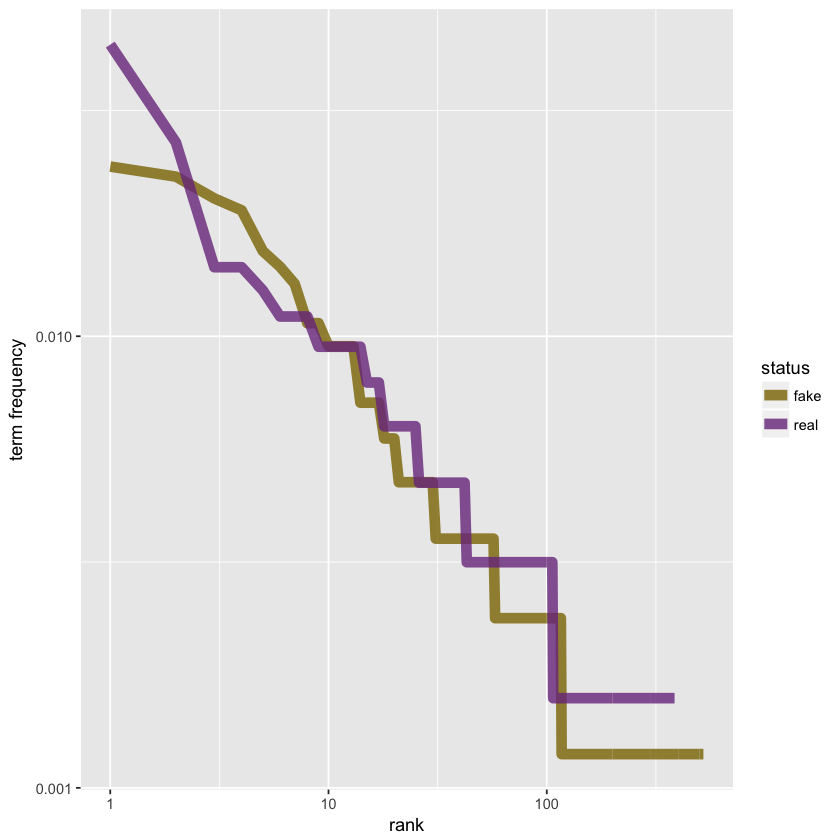

In [37]:
myColors <- c("gold4", "mediumorchid4")

# plot Zipf's law
freq_by_rank %>% 
  ggplot(aes(rank, `term frequency`, col=status)) + 
  geom_line(size = 3, alpha = 0.8) + 
  scale_x_log10() +
  scale_y_log10() + 
  scale_color_manual(values=myColors)

From the above graph, we can see that words associate with real news headlines have a higher rank - which is not surprising.

I will now use TF-IDF (Term Frequency–Inverse Document Frequency) to find the most relevant word for each article headline. According to [tidytextmining](http://tidytextmining.com/tfidf.html#term-frequency-in-jane-austens-novels), "the idea of tf-idf is to find the important words for the content of each document by decreasing the weight for commonly used words and increasing the weight for words that are not used very much in a collection or corpus of documents."

TF-IDF may be a good method to use in regards to understanding contents of a document (or headline, in our case) because it finds words that are common, but not too common. This perhaps get rids of words that are unnecessary or irrelevant. 

In [38]:
news_words <- news_words %>%
  bind_tf_idf(word, status, n)
news_words

status,word,n,total,tf,idf,tf_idf
real,trump,28,633,0.044233807,0.0000000,0.000000000
fake,obama,20,842,0.023752969,0.0000000,0.000000000
fake,trump,19,842,0.022565321,0.0000000,0.000000000
fake,in,17,842,0.020190024,0.0000000,0.000000000
real,to,17,633,0.026856240,0.0000000,0.000000000
fake,the,16,842,0.019002375,0.0000000,0.000000000
fake,to,13,842,0.015439430,0.0000000,0.000000000
fake,breaking,12,842,0.014251781,0.0000000,0.000000000
fake,of,11,842,0.013064133,0.0000000,0.000000000
fake,and,9,842,0.010688836,0.0000000,0.000000000


We can see that tf-idf scores are ZERO for words that are very common. They appear in both types of news headlines. The idf will be low for such words and higher for words that appear in fewer headlines.

In [39]:
# order terms by highest tf-idf score
news_words %>%
  select(-total) %>%
  arrange(desc(tf_idf))

status,word,n,tf,idf,tf_idf
real,trump's,9,0.014218009,0.6931472,0.009855173
fake,just,8,0.009501188,0.6931472,0.006585721
real,russia,5,0.007898894,0.6931472,0.005475096
fake,america,6,0.007125891,0.6931472,0.004939291
fake,isis,6,0.007125891,0.6931472,0.004939291
real,attorney,4,0.006319115,0.6931472,0.004380077
real,obamacare,4,0.006319115,0.6931472,0.004380077
real,over,4,0.006319115,0.6931472,0.004380077
fake,order,4,0.004750594,0.6931472,0.003292861
fake,they,4,0.004750594,0.6931472,0.003292861


Selecting by tf_idf


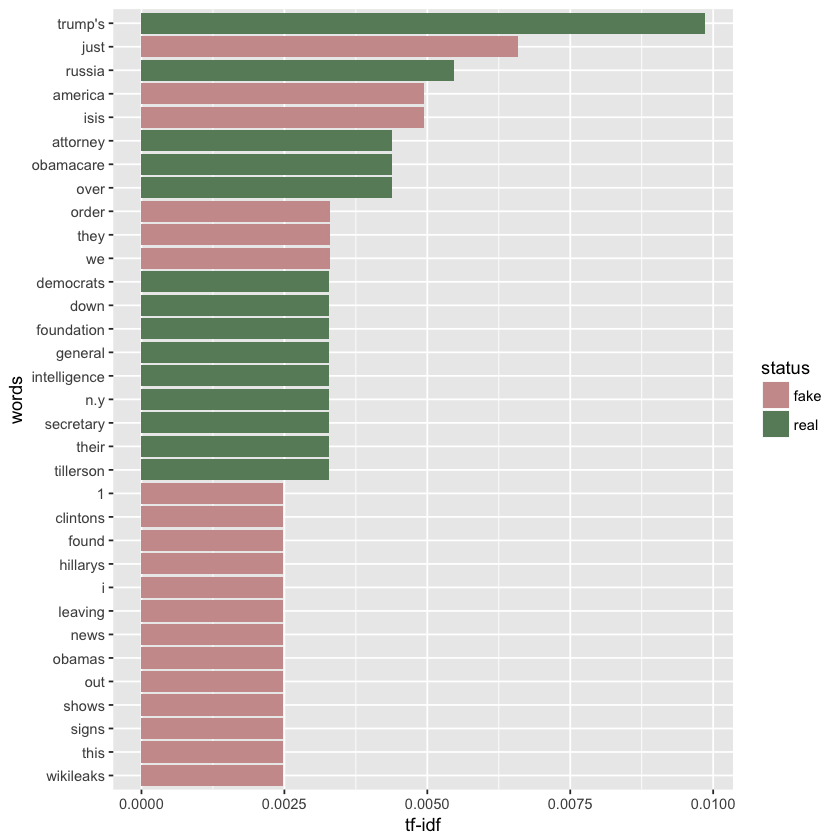

In [40]:
myColors <- c("rosybrown3", "darkseagreen4")

# plot top 30 words by tf-idf
plot_ <- news_words %>%
  arrange(desc(tf_idf)) %>%
  mutate(word = factor(word, levels = rev(unique(word))))

plot_ %>% 
  top_n(30) %>%
  ggplot(aes(word, tf_idf, fill = status)) +
  geom_bar(stat="identity") +
  scale_fill_manual(values=myColors) + #scale_fill instead of scale_col to fill color manually
  labs(x = "words", y = "tf-idf") +
  coord_flip() 

Selecting by tf_idf


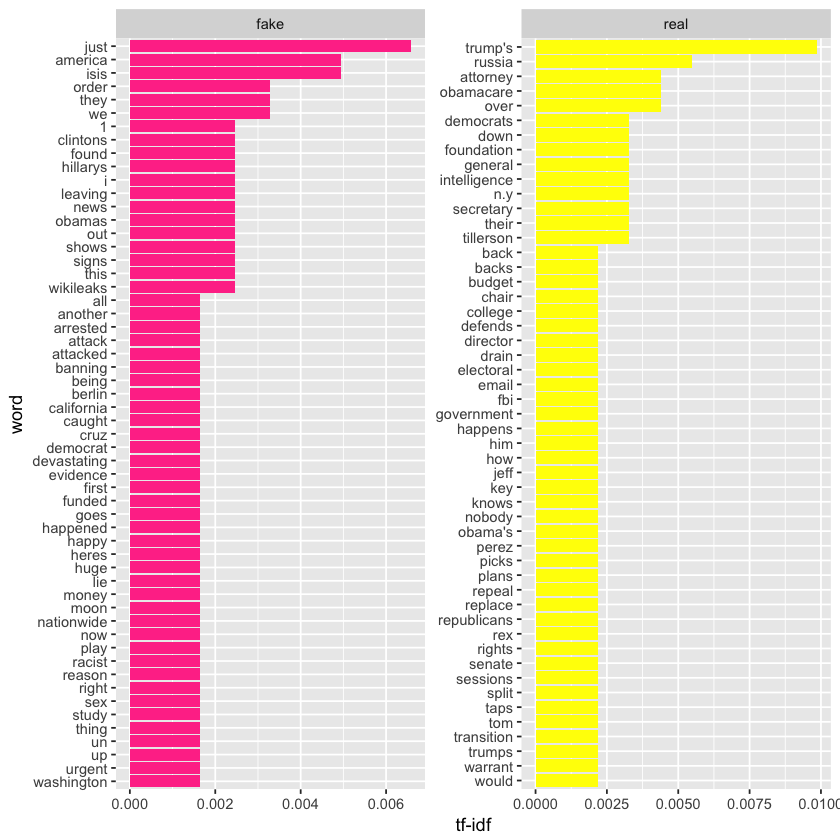

In [41]:
myColors <- c("violetred1", "yellow1")

# plot by grouping for top 25 words
plot_ %>% 
  group_by(status) %>% 
  top_n(25) %>% 
  ungroup %>%
  ggplot(aes(word, tf_idf, fill = status)) +
  geom_col(show.legend = FALSE) +
  labs(x = "word", y = "tf-idf") +
  facet_wrap(~status, ncol = 2, scales = "free") +
  scale_fill_manual(values=myColors) +
  coord_flip()

### News Classifier Using K-Nearest Neighbors Algorithm

In [42]:
# turn off warnings
options(warn=-1)

In [43]:
#install.packages("RTextTools") #try installing this as a package

In [ ]:
# set seed value
set.seed(100)

In [45]:
# generate headlines corpus
headlines <- Corpus(VectorSource(mydata$text))

In [ ]:
# clean headlines
headlines <- tm_map(headlines, content_transformer(tolower))
headlines <- tm_map(headlines, removeNumbers)
headlines <- tm_map(headlines, removeWords, stopwords("english"))
headlines <- tm_map(headlines, removePunctuation)
headlines <- tm_map(headlines, stripWhitespace)
headlines <- tm_map(headlines, stemDocument, language = "english")

In [46]:
# create document-term matrix
dtm <- DocumentTermMatrix(headlines)

In [47]:
# transforms document-term matrix to dataframe
mat.mydata <- as.data.frame(data.matrix(dtm), stringsAsfactors = FALSE)

In [48]:
# column bind on status
mat.mydata <- cbind(mat.mydata, mydata$status)

In [49]:
# Change name of new column to "status"
colnames(mat.mydata)[ncol(mat.mydata)] <- "status"

In [50]:
# split data into equal parts
train <- sample(nrow(mat.mydata), ceiling(nrow(mat.mydata) * .50))
test <- (1:nrow(mat.mydata))[- train]

In [56]:
# isolate classifier
classifier <- mat.mydata[, "status"]

In [57]:
# Create model data and remove "category"
modeldata <- mat.mydata[,!colnames(mat.mydata) %in% "status"]

In [58]:
# Create KNN model: training set, test set, training set classifier
knn.pred <- knn(modeldata[train, ], modeldata[test, ], classifier[train])

In [59]:
# Confusion matrix
#conf.mat <- table("Predictions" = knn.pred, Actual = classifier[test])
#conf.mat

# Accuracy
#(accuracy <- sum(diag(conf.mat))/length(test) * 100)

# Create data frame with test data and predicted category
#mydata.pred <- cbind(knn.pred, modeldata[test, ])
#write.table(mydata.pred, file="output.csv", sep=";")

## Take my Survey (or Share with Friends): http://bit.ly/2j2Vm48

<b>Sample Question:</b><br><br>Obama To Issue Executive Order Extending Presidential Term Limits
- real ?
- fake ?